# 构建高级模型

## 函数式API

tf.keras.Sequential 模型是层的简单堆叠，无法表示任意模型。深度学习模型通常是由layer构成的有向无环图(directed acyclic graph, DAG),使用 Keras 函数式 API 可以构建复杂的模型拓扑，例如：

- 多输入模型，
- 多输出模型，
- 具有共享层的模型（同一层被调用多次），
- 具有非序列数据流的模型（例如，剩余连接）。

使用函数式 API 构建的模型具有以下特征：

- 层实例可调用并返回张量。
- 输入张量和输出张量用于定义 tf.keras.Model 实例。
- 此模型的训练方式和 Sequential 模型一样。

## 使用函数式API构建一个简单的全连接网络

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
inputs = tf.keras.Input(shape=(32,))
print(inputs.shape, inputs.dtype)

x = layers.Dense(64, activation='relu', name='Dense_Layer1')(inputs)  # 通过name参数为layer设置名称
x = layers.Dense(64, activation=tf.keras.activations.relu)(inputs=x)
predictions = layers.Dense(10, activation=tf.keras.activations.softmax)(inputs=x)

(None, 32) <dtype: 'float32'>


在给定输入和输出的情况下实例化模型。

In [6]:
model = tf.keras.Model(inputs=inputs, outputs=predictions)

模型结构可视化

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
Dense_Layer1 (Dense)         (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 6,922
Trainable params: 6,922
Non-trainable params: 0
_________________________________________________________________


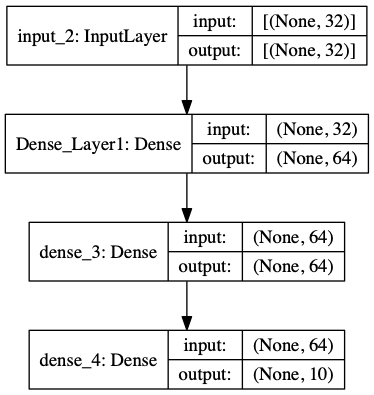

In [9]:
keras.utils.plot_model(model, 'my_model.png', show_layer_names=True, show_shapes=True)

In [86]:
# compile 
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.CategoricalAccuracy()]
             )

In [87]:
model.fit(data, labels, batch_size=32, epochs=5)

Epoch 1/5
1000/1000 [==============================] - 0s 113us/sample - loss: 203.2984 - categorical_accuracy: 0.1130
Epoch 2/5
1000/1000 [==============================] - 0s 34us/sample - loss: 843.6980 - categorical_accuracy: 0.1060
Epoch 3/5
1000/1000 [==============================] - 0s 33us/sample - loss: 1762.6182 - categorical_accuracy: 0.0910
Epoch 4/5
1000/1000 [==============================] - 0s 26us/sample - loss: 2914.6214 - categorical_accuracy: 0.0950
Epoch 5/5
1000/1000 [==============================] - 0s 25us/sample - loss: 4258.0425 - categorical_accuracy: 0.0970


## 使用函数式API解决Mnist数字识别问题

### 模型训练集、测试集准备

keras.datasets中的数据集：
[从官网API中查看tf.keras内置的数据集列表、数据集的介绍、使用方法](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/datasets)  
- boston_housing module: Boston housing price regression dataset.
- cifar10 module: CIFAR10 small images classification dataset.
- cifar100 module: CIFAR100 small images classification dataset.
- fashion_mnist module: Fashion-MNIST dataset.
- imdb module: IMDB sentiment classification dataset.
- mnist module: MNIST handwritten digits dataset.
- reuters module: Reuters topic classification dataset.

通过数据集实例的load_data()方法，加载内置的数据集，包括训练集feature、训练集label、测试集feature和测试集label四部分。  
当本地不存在时，会默认先从官网下载，存在则直接加载本地缓存文件。
load_data()方法默认会将下载的数据集缓存到本地磁盘(~/.keras/datasets)目录,也可用通过path参数修改缓存目录。

In [27]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

11493376/11490434 [==============================] - 24s 2us/step


### 模型构建

In [16]:
inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

### 模型结构可视化
两种方式：  
- summary
- plot

In [17]:
# summary方式
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


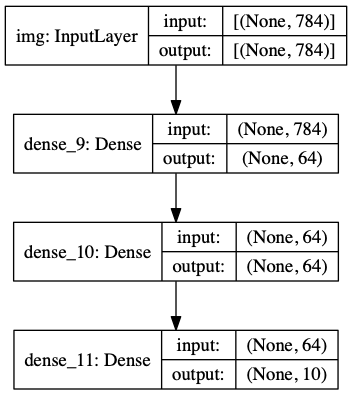

In [25]:
# plot方式
keras.utils.plot_model(model,'./model/mnist_model.png', show_layer_names=True, show_shapes=True)

### 模型compile，配置模型学习流程

In [28]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

### 模型训练

In [29]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 22us/sample - loss: 0.3469 - accuracy: 0.9001 - val_loss: 0.1736 - val_accuracy: 0.9500
Epoch 2/5
48000/48000 [==============================] - 1s 17us/sample - loss: 0.1575 - accuracy: 0.9528 - val_loss: 0.1338 - val_accuracy: 0.9585
Epoch 3/5
48000/48000 [==============================] - 1s 17us/sample - loss: 0.1140 - accuracy: 0.9662 - val_loss: 0.1206 - val_accuracy: 0.9662
Epoch 4/5
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0914 - accuracy: 0.9720 - val_loss: 0.1046 - val_accuracy: 0.9688
Epoch 5/5
48000/48000 [==============================] - 1s 17us/sample - loss: 0.0745 - accuracy: 0.9776 - val_loss: 0.1063 - val_accuracy: 0.9697


In [31]:
history.history

{'loss': [0.3468913005987803,
  0.1574785461847981,
  0.11402909897640348,
  0.09142843706347048,
  0.07452666845514129],
 'accuracy': [0.90010417, 0.9528125, 0.9661875, 0.97197914, 0.9776458],
 'val_loss': [0.17362174842755,
  0.13383585823327304,
  0.12056573683520158,
  0.10458559019863606,
  0.10631672675907612],
 'val_accuracy': [0.95, 0.9585, 0.9661667, 0.96875, 0.96975]}

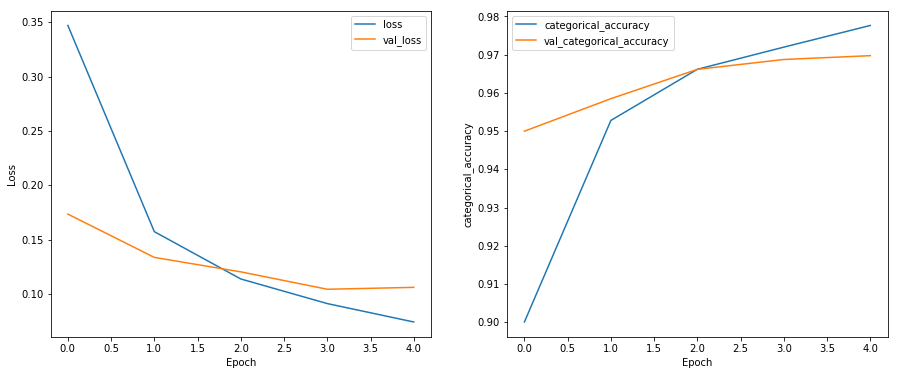

In [35]:
# 模型训练过程分析
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(history.epoch, loss)
plt.plot(history.epoch, val_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.subplot(122)
plt.plot(history.epoch, accuracy)
plt.plot(history.epoch, val_accuracy)
plt.xlabel('Epoch')
plt.ylabel('categorical_accuracy')
plt.legend(['categorical_accuracy', 'val_categorical_accuracy'])
plt.show()

### 模型评估

In [34]:
test_scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Test loss: 0.10318884338364005
Test accuracy: 0.9682


### 模型保存
在上一节介绍了模型保存的三种方式。

In [36]:
model.save('model/mnist_model.h5')
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model('model/mnist_model.h5')


## 使用函数式API构建复杂结构神经网路

### 复用部分layers构建多个神经网络

深度学习模型通常是由layer构成的有向无环图(directed acyclic graph, DAG).

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 16)                0   

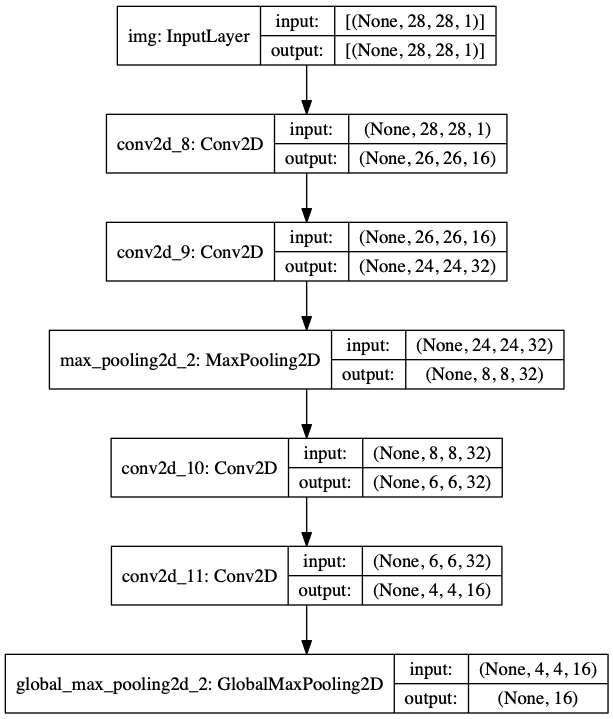

In [5]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()
keras.utils.plot_model(encoder, show_layer_names=True, show_shapes=True)

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 16)                

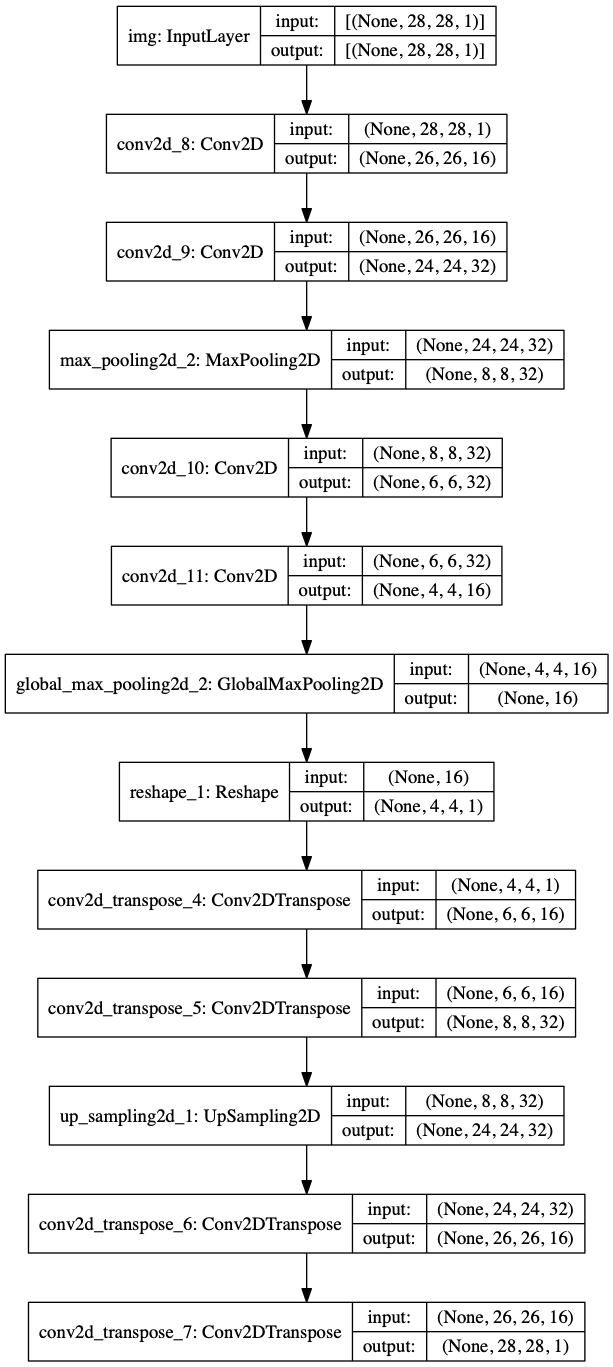

In [6]:
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()
keras.utils.plot_model(autoencoder, show_shapes=True)

In [37]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1, activation='sigmoid')(inputs)
    return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

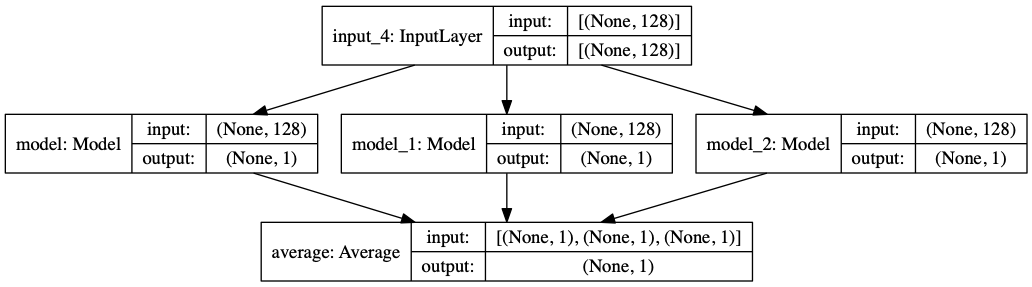

In [39]:
keras.utils.plot_model(ensemble_model, show_layer_names=True, show_shapes=True)